Tasks:Set 1

In [582]:
from sklearn.datasets import load_boston
import numpy as np

In [583]:
data, target = load_boston(return_X_y=True)

Least Square Folds

In [584]:
x = len(data)
y = len(data[0])
features = np.ones((x,y+1))
features[:,0:13]=data

In [585]:
b = w[13]

In [586]:
features.shape

(506, 14)

In [587]:
fold1 = features[:101,:]
print(fold1.shape)
foldlabel1 = target[:101]

(101, 14)


In [588]:
fold2 = features[101:202,:]
print(fold2.shape)
foldlabel2 = target[101:202]

(101, 14)


In [589]:
fold3 = features[202:303,:]
print(fold3.shape)
foldlabel3 = target[202:303]

(101, 14)


In [590]:
fold4 = features[303:404,:]
print(fold4.shape)
foldlabel4 = target[303:404]

(101, 14)


In [591]:
fold5 = features[404:507,:]
print(fold5.shape)
foldlabel5 = target[404:507]

(102, 14)


In [592]:
mattotal = [fold1,fold2,fold3,fold4,fold5]
labeltotal = [foldlabel1,foldlabel2,foldlabel3,foldlabel4,foldlabel5]

Least Squares Algorithm

In [593]:
def error_rate(trained,actual):
    w = np.zeros(trained.shape[0])
    for i in range(trained.shape[0]):
        w[i] = (trained[i] - actual[i])**2
    return np.mean(w)

In [594]:
def least_squares(x,y,test):
        wfull = np.linalg.inv(x.T@x)@x.T@y
        return test@wfull

In [595]:
def cross_validation(k, splitdata, splitlabels,lam=None):
    z = np.zeros(k)
    final = [];
    for i in range(k):
        training_data = np.concatenate(np.delete(splitdata, i,0),axis=0)
        train_labels = np.concatenate(np.delete(splitlabels, i,0),axis=0)
        test_data = splitdata[i]
        test_labels = splitlabels[i]
        if(lam):
            y_tested = ridgeregression(training_data,train_labels,test_data,lam)
        else:    
            y_tested = least_squares(training_data,train_labels,test_data)
        z[i] = error_rate(y_tested,test_labels)
        final = np.concatenate((final,y_tested))
    return np.mean(z),final
        

In [596]:
mean,testans = cross_validation(5, mattotal,labeltotal)
print("Mean Error",mean,".")

Mean Error 37.125390481938354 .


Least Square Plot

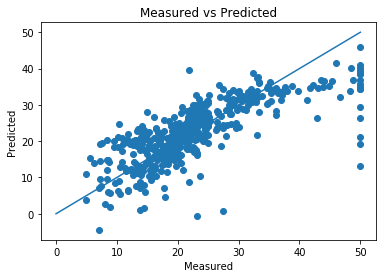

In [597]:
import matplotlib.pyplot as plt
plt.scatter(target, testans)
plt.title("Measured vs Predicted")
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.plot(np.linspace(0,50,506),np.linspace(0,50,506))

Tasks:Set 2

Ridge Regression

In [602]:
def ridgeregression(x,y,test,lam):
    w = np.linalg.inv((x.T@x + lam*np.identity(x.shape[1])))@x.T@y
    return test@w

In [603]:
def rrmain(k,splitdata,splitlabels,lam):
    newsplitdata = np.delete(splitdata, 0,0)
    newsplitlabels = np.delete(splitlabels, 0,0)
    errlam = np.zeros(lam.size)
    for i in range(lam.size):
        errlam[i] = (cross_validation(k-1,newsplitdata,newsplitlabels,lam[i]))[0]
    bestlam = lam[np.argmin(errlam)]
    return cross_validation(k,splitdata,splitlabels,bestlam)

In [604]:
rrmain,rrtestans = rrmain(5,mattotal,labeltotal,np.linspace(0,10,11))

In [605]:
print("Mean Error",rrmain,".")

Mean Error 32.51717769795693 .
